## Third part

In [1]:
## analytical answer
import math

g = 9.81
G = 6.67e-11
R = 6.37e6
M = g*R**2/G

y = 1e3
dv_perc = 0

while dv_perc<0.01:
    y += 1
    v1 = math.sqrt(2*G*M*(1/R-1/(R+y)))
    v2 = math.sqrt(2*g*y)
    dv_perc = v2/v1-1
    
print(y)

128037.0


In [2]:
class particle(object):
    g = 9.8
    dt = 0.01         # time step
    
    def __init__(self, mass=1., y=0., v=0.):
        self.mass = mass
        self.y = y
        self.v = v
        
    def euler(self, f, dt):
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.v = self.v + f/self.mass*dt
        self.y = self.y + self.v*dt
        
    def get_impact_v(self, g_variable):

        y = [self.y] # since we do not know the size of the arrays, we define first a python list
        v = [self.v] # the append method is more efficient for lists than arrays
        t = [0.]

        while self.y > 0.:
            fy = -self.mass*g / (1+self.y/6.37e6)**2 if g_variable else -self.mass*g
            self.euler(fy, self.dt)
            y.append(self.y)
            v.append(self.v)
            t.append(t[-1]+self.dt)

        t_data = np.array(t) # we convert the list into a numpy array for plotting
        y_data = np.array(y)
        v_data = np.array(v)

        return t_data,y_data,v_data
    
    

impact velecity is -76.807473 m/s 



Text(0,0.5,'velocity(m/s)')

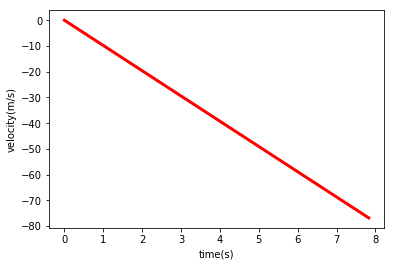

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

mass = 0.01        # mass of the particle
y0 = 300.          # initial position
v0 = 0.            # initial velocity
vt = 30.           # terminal velocity

p = particle(mass, y0, v0)

#for i in range(0,t_data.size):
#    print i,t_data[i], y_data[i], v_data[i]

t_data,y_data,v_data = p.get_impact_v(g_variable=True)

print('impact velecity is %f m/s \n' % v_data[-1])
pyplot.plot(t_data, v_data, color="#FF0000", ls='-', lw=3)
pyplot.xlabel('time(s)')
pyplot.ylabel('velocity(m/s)')

In [4]:
## find out 1% difference y0
y0 = 120000
v0 = 0
dv_perc = 0

while dv_perc < 0.01:
    y0 += 100
    p = particle(mass, y0, v0)
    _,_,v_data1 = p.get_impact_v(g_variable=True)
    p = particle(mass, y0, v0)
    _,_,v_data2 = p.get_impact_v(g_variable=False)
    dv_perc = v_data2[-1]/v_data1[-1] - 1

print('required height to make a 0.01 difference is %f m \n' % y0)


required height to make a 0.01 difference is 127500.000000 m 



## Last part, coming soon...

In [5]:
class particle2(object):
    
    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
       
    def euler(self, fx, fy, dt):
        self.vx = self.vx + fx/self.mass*dt
        self.vy = self.vy + fy/self.mass*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt
        
        

[16.374130486290703, 0.5759586531581287, 0.18333333333333332]


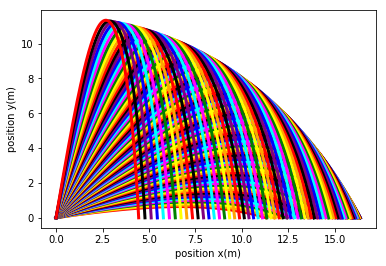

In [19]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib.colors import ColorConverter as cc
import math

g = 9.8            # g acceleration
v0 = 30.           # initial velocity
dt = 0.001           # time step

from itertools import cycle
colors = cycle(['red','orange','yellow','green','magenta','cyan','blue','purple','black'])

max_reach = [0, 0, 0] # x-range, angle, angle/pi
angle_array = np.linspace(0.05*math.pi,0.45*math.pi, 100)
for angle in angle_array:
    x = [0]                                  # we need to initialize the arrays for each value of the angle
    y = [0]
    vx = [math.cos(angle)*v0] 
    vy = [math.sin(angle)*v0] 
    t = [0.]

    p = particle2(1., 0., 0., vx[0], vy[0])
    k_eff = 0.1
    while p.y >= 0.:
        speed = math.sqrt((p.vx)**2 + (p.vy)**2)
        fx = -k_eff*speed*p.vx
        fy = -g - k_eff*speed*p.vy
        p.euler(fx, fy, dt)
        x.append(p.x)
        y.append(p.y)
        vx.append(p.vx)
        vy.append(p.vy)
        t.append(t[-1]+dt)
    
    t_data = np.array(t) # we convert the list into a numpy array for plotting
    x_data = np.array(x)
    y_data = np.array(y)
    vx_data = np.array(vx)
    vy_data = np.array(vy)
    
    if x_data[-1]>max_reach[0]:
        max_reach = [x_data[-1], angle, angle/math.pi]
    
    my_plot = pyplot.plot(x_data, y_data, color=next(colors), ls='-', lw=3, label = str(angle/math.pi)+'pi')
    if len(angle_array)<10:
        pyplot.legend()

pyplot.xlabel('position x(m)')
pyplot.ylabel('position y(m)')
print(max_reach)